In [16]:
import pickle
from typing import List
from ext.jjnp21.automator.analyzer import BasicResultAnalyzer
from ext.jjnp21.automator.experiment import *
import matplotlib.pyplot as plt

base_path = '/home/jp/Documents/tmp/1000s75rq/'
city_dump_path = '/home/jp/Documents/tmp/1000s75rq/city/city.dump'
nation_dump_path = '/home/jp/Documents/tmp/1000s75rq/nation/nation.dump'
global_dump_path = '/home/jp/Documents/tmp/1000s75rq/global/global.dump'

# This is just here to have a central location to get the strings identifying the results
rrc = 'Round Robin centralized'
rrd = 'Round Robin on all nodes'
lrtc = 'Least Response Time centralized'
lrtd = 'Least Response Time on all nodes'

def load_results(path) -> List[Result]:
    with open(path, 'rb') as f:
        results = pickle.load(f)
        return results
        
def get_compiled_results():
    results = {}
    for key in ['city', 'nation', 'global']:
        results[key] = {}
        rs = load_results(f'{base_path}{key}/{key}.dump')
        for r in rs:
            results[key][r.experiment.name] = r
    return results
    
r = get_compiled_results() 
r

{'city': {'Least Response Time on all nodes': Result(experiment=Experiment(name='Least Response Time on all nodes', topology_factory=<ext.jjnp21.automator.factories.topology.RaithHeterogeneousUrbanSensingFactory object at 0x7f66d82dbc10>, benchmark_factory=<ext.jjnp21.automator.factories.benchmark.ConstantBenchmarkFactory object at 0x7f66d82db290>, faas_factory=<ext.jjnp21.automator.factories.faas.LocalizedLoadBalancerFaaSFactory object at 0x7f66d82db410>, lb_type=<LoadBalancerType.LEAST_RESPONSE_TIME: 2>, lb_placement_strategy=<LoadBalancerPlacementStrategy.ALL_NODES: 2>, client_lb_resolving_strategy=<ClientLoadBalancerResolvingStrategy.LOWEST_PING: 1>, client_placement_strategy=<ClientPlacementStrategy.NONE: 1>, seed=42), run_duration_seconds=614.37, invocations=                            t_wait    t_exec      t_start     memory  \
  time                                                                   
  2021-06-22 14:07:42.488953     0.0  0.033747   103.013333  419430400   
  202

In [47]:
def e2e_histogram(subplot, results, title):
    data = []
    for key in [rrc, rrd, lrtc, lrtd]:
        data.append(results[key].invocations['t_exec'])
    subplot.set_title(title)
    subplot.tick_params(labelrotation=30, axis='x')
    subplot.boxplot(data, labels=['RR-central', 'RR-dist', 'LRT-central', 'LRT-dist'], notch=True, whis=10)

def network_histogram(subplot, results, title):
    data = []
    for key in [rrc, rrd, lrtc, lrtd]:
        data.append(results[key].invocations['tx_time_cl_lb'] + results[key].invocations['tx_time_lb_fx'])
    subplot.set_title(title)
    subplot.tick_params(labelrotation=30, axis='x')
    subplot.boxplot(data, labels=['RR-central', 'RR-dist', 'LRT-central', 'LRT-dist'], notch=True, whis=10)
    
def fet_histogram(subplot, results, title):
    data = []
    for key in [rrc, rrd, lrtc, lrtd]:
        data.append(results[key].fets['t_fet'])
    subplot.set_title(title)
    subplot.tick_params(labelrotation=30, axis='x')
    subplot.boxplot(data, labels=['RR-central', 'RR-dist', 'LRT-central', 'LRT-dist'], notch=True, whis=10)
    

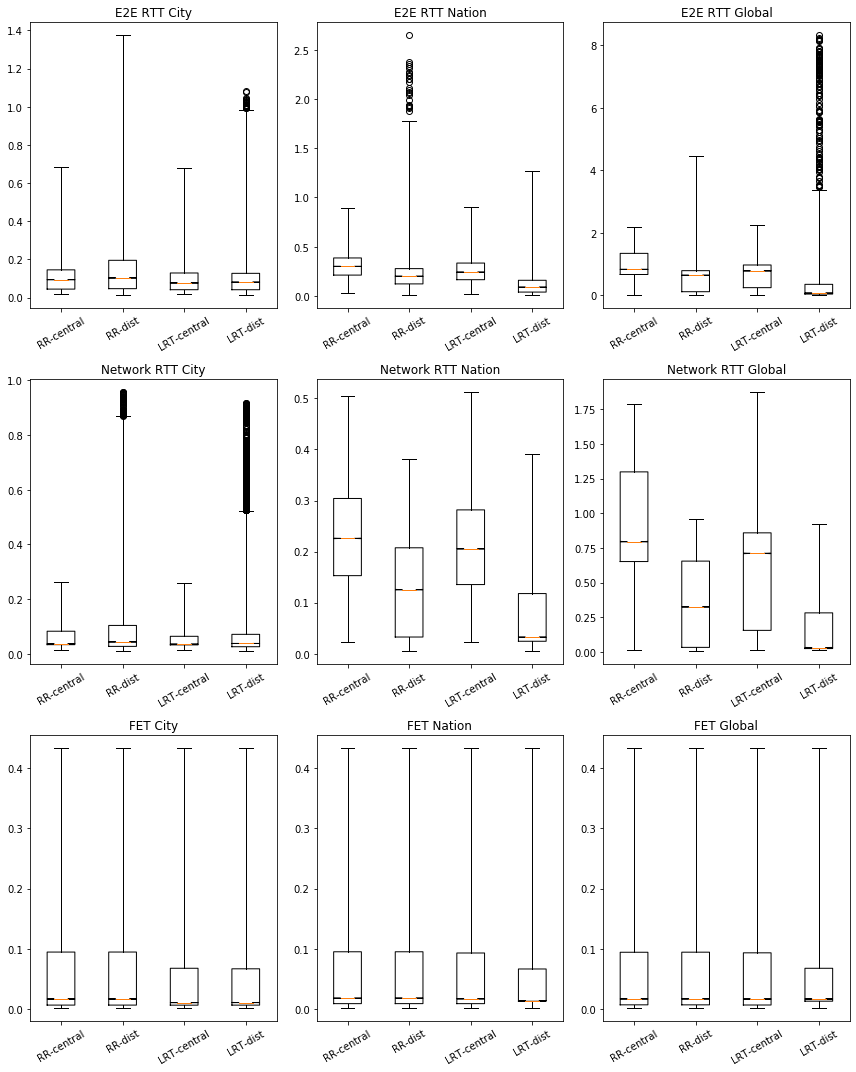

In [48]:
fig, axs = plt.subplots(3,3)
fig.set_figheight(15)
fig.set_figwidth(12)
e2e_histogram(axs[0, 0], r['city'], 'E2E RTT City')
e2e_histogram(axs[0, 1], r['nation'], 'E2E RTT Nation')
e2e_histogram(axs[0, 2], r['global'], 'E2E RTT Global')

network_histogram(axs[1, 0], r['city'], 'Network RTT City')
network_histogram(axs[1, 1], r['nation'], 'Network RTT Nation')
network_histogram(axs[1, 2], r['global'], 'Network RTT Global')

fet_histogram(axs[2, 0], r['city'], 'FET City')
fet_histogram(axs[2, 1], r['nation'], 'FET Nation')
fet_histogram(axs[2, 2], r['global'], 'FET Global')

fig.tight_layout()
plt.show()